In [ ]:
import numpy as np
import pandas as pd

num_samples = 1000
room_width = np.random.randint(3, 10, num_samples)
room_height = np.random.randint(3, 10, num_samples)
furniture_size = np.random.randint(1, np.minimum(room_width, room_height), num_samples)  # Ensure furniture fits

data = pd.DataFrame({'Room_Width': room_width, 'Room_Height': room_height, 'Furniture_Size': furniture_size})

data['X_Pos'] = [np.random.randint(0, w - s + 1) for w, s in zip(data['Room_Width'], data['Furniture_Size'])]
data['Y_Pos'] = [np.random.randint(0, h - s + 1) for h, s in zip(data['Room_Height'], data['Furniture_Size'])]

data.to_csv('furniture_layout_data.csv', index=False)
print(data.head())  # Display the first few rows


   Room_Width  Room_Height  Furniture_Size  X_Pos  Y_Pos
0           7            8               1      2      0
1           8            7               5      3      2
2           3            3               1      2      1
3           3            5               1      0      0
4           4            7               2      2      4


In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers

df = pd.read_csv('furniture_layout_data.csv')
X = df[['Room_Width', 'Room_Height', 'Furniture_Size']]
y = df[['X_Pos', 'Y_Pos']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = keras.Sequential([
    layers.Input(shape=(3,)),  # Explicit input layer (Fixes warning)
    layers.Dense(16, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(2)  # Output: (X_Pos, Y_Pos)
])

model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=1)
model.save("furniture_model.keras")

Epoch 1/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 6.0060
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.6209
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.2972
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.0983
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.0718
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.9841
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.9976
Epoch 8/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.0011
Epoch 9/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.1099
Epoch 10/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.0901
Epoch 11/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.9940
Epoch 12/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.9432
Epoch 13/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.9442
Epoch 14/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.9471
Epoch 15/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.8732
Epoch 16/50
50/50 ━

In [ ]:
sample_input = np.array([[6, 7, 2]])
predicted_position = model.predict(sample_input)
print(f"Predicted furniture position: {predicted_position}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
Predicted furniture position: [[2.0652146 2.4839714]]


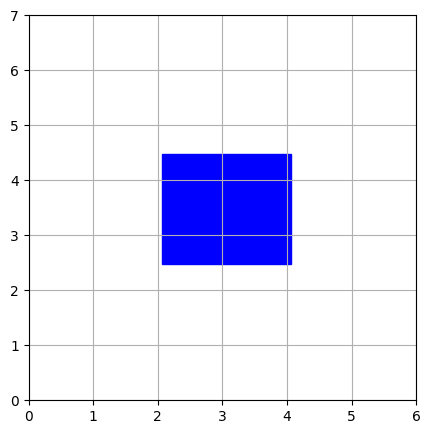

In [ ]:
import matplotlib.pyplot as plt

def visualize_layout(room_width, room_height, furniture_size, x, y):
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.set_xlim(0, room_width)
    ax.set_ylim(0, room_height)
    ax.add_patch(plt.Rectangle((x, y), furniture_size, furniture_size, color='blue'))
    plt.grid()
    plt.show()

visualize_layout(6, 7, 2, predicted_position[0][0], predicted_position[0][1])


In [ ]:
model = tf.keras.models.load_model("furniture_model.keras")


In [ ]:

!pip install gradio tensorflow numpy


In [ ]:
import numpy as np

def predict_furniture(room_width, room_height, furniture_size):
    """Takes room dimensions & furniture size, predicts best placement (X, Y)."""
    input_data = np.array([[room_width, room_height, furniture_size]])
    prediction = model.predict(input_data)[0]
    return f"Predicted Position: X = {int(prediction[0])}, Y = {int(prediction[1])}"


In [ ]:

import gradio as gr

ui = gr.Interface(
    fn=predict_furniture,
    inputs=[
        gr.Number(label="Room Width", value=5, minimum=3, maximum=10),
        gr.Number(label="Room Height", value=5, minimum=3, maximum=10),
        gr.Number(label="Furniture Size", value=2, minimum=1, maximum=4)
    ],
    outputs="text",
    title="Furniture Placement Predictor",
    description="Enter room dimensions and furniture size, and let AI predict the optimal (X, Y) position!"
)

ui.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://4d45bfac3b2cbb19d2.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
